In [1]:
import altair as alt
import jupyterlab_omnisci.vega_ibis
import ibis
import pandas as pd


alt.data_transformers.enable('ibis')
alt.renderers.enable('ibis')

RendererRegistry.enable('ibis')

## Simple Data

In [2]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})
connection = ibis.pandas.connect({'source': source })
table = connection.table('source')

alt.Chart(table).mark_bar().encode(
    x='a',
    y='b'
)

/usr/local/miniconda3/envs/jupyterlab-omnisci/lib/python3.7/site-packages/altair/utils/core.py:90: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


Chart({
  data: Empty DataFrame
  Columns: [a, b]
  Index: [],
  encoding: FacetedEncoding({
    x: X({
      shorthand: 'a'
    }),
    y: Y({
      shorthand: 'b'
    })
  }),
  mark: 'bar'
})

## Aggregate

In [3]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52],
    'c': ['first', 'first', 'first', 'second', 'second', 'second', 'third', 'third', 'third']

})
connection = ibis.pandas.connect({'source': source })
table = connection.table('source')

jupyterlab_omnisci.vega_ibis._executed_expressions = []

alt.Chart(table).mark_bar().encode(
    x='c',
    y='mean(b)'
)

Chart({
  data: Empty DataFrame
  Columns: [a, b, c]
  Index: [],
  encoding: FacetedEncoding({
    x: X({
      shorthand: 'c'
    }),
    y: Y({
      shorthand: 'mean(b)'
    })
  }),
  mark: 'bar'
})

Verify that the only query computed is an aggregate:

In [4]:
assert len(jupyterlab_omnisci.vega_ibis._executed_expressions) == 1
jupyterlab_omnisci.vega_ibis._executed_expressions[0]

ref_0
PandasTable[table]
  name: source
  schema:
    a : string
    b : int64
    c : string

Aggregation[table]
  table:
    Table: ref_0
  metrics:
    mean_b = Mean[float64]
      b = Column[int64*] 'b' from table
        ref_0
      where:
        None
  by:
    c = Column[string*] 'c' from table
      ref_0

## Filter

In [5]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52],
    'c': ['first', 'first', 'first', 'second', 'second', 'second', 'third', 'third', 'third']

})
connection = ibis.pandas.connect({'source': source })
table = connection.table('source')

jupyterlab_omnisci.vega_ibis._executed_expressions = []

alt.Chart(table).mark_bar().encode(
    x='a',
    y='b'
).transform_filter(
    alt.datum.c == 'first'
)

Chart({
  data: Empty DataFrame
  Columns: [a, b, c]
  Index: [],
  encoding: FacetedEncoding({
    x: X({
      shorthand: 'a'
    }),
    y: Y({
      shorthand: 'b'
    })
  }),
  mark: 'bar',
  transform: [FilterTransform({
    filter: (datum.c === 'first')
  })]
})

In [11]:
jupyterlab_omnisci.vega_ibis._executed_expressions

[ref_0
 PandasTable[table]
   name: source
   schema:
     a : string
     b : int64
     c : string
 
 Selection[table]
   table:
     Table: ref_0
   predicates:
     Equals[boolean*]
       left:
         c = Column[string*] 'c' from table
           ref_0
       right:
         Literal[string]
           first]

## Interactive Filter

First lets try this with the default transforms:

In [5]:
alt.data_transformers.enable('default')
alt.renderers.enable('default')

RendererRegistry.enable('default')

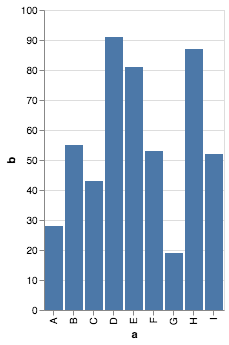

In [13]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52],
    'c': ['first', 'first', 'first', 'second', 'second', 'second', 'third', 'third', 'third']

})

input_dropdown = alt.binding_select(options=['first','second'])
selection = alt.selection_single(fields=['c'], bind=input_dropdown, name='Filter')

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
).add_selection(
    selection
).transform_filter(
    selection
)

Now let's try it with Ibis:

In [15]:
alt.data_transformers.enable('ibis')
alt.renderers.enable('ibis')

RendererRegistry.enable('ibis')

In [6]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52],
    'c': ['first', 'first', 'first', 'second', 'second', 'second', 'third', 'third', 'third']

})

connection = ibis.pandas.connect({'source': source })
table = connection.table('source')

jupyterlab_omnisci.vega_ibis._executed_expressions = []


input_dropdown = alt.binding_select(options=['first','second'])
selection = alt.selection_single(fields=['c'], bind=input_dropdown, name='Filter')

alt.Chart(table).mark_bar().encode(
    x='a',
    y='b'
).add_selection(
    selection
).transform_filter(
    selection
)

Chart({
  data: Empty DataFrame
  Columns: [a, b, c]
  Index: [],
  encoding: FacetedEncoding({
    x: X({
      shorthand: 'a'
    }),
    y: Y({
      shorthand: 'b'
    })
  }),
  mark: 'bar',
  selection: {'Filter': SelectionDef({
    bind: BindRadioSelect({
      input: 'select',
      options: ['first', 'second']
    }),
    fields: ['c'],
    type: 'single'
  })},
  transform: [FilterTransform({
    filter: {'selection': 'Filter'}
  })]
})

In [8]:
jupyterlab_omnisci.vega_ibis._incoming_specs[-1]

{'$schema': 'https://vega.github.io/schema/vega/v5.json',
 'autosize': 'pad',
 'padding': 5,
 'height': 300,
 'style': 'cell',
 'data': [{'name': 'Filter_store'},
  {'name': 'ibis:5645067724471136176'},
  {'name': 'data_0',
   'source': 'ibis:5645067724471136176',
   'transform': [{'type': 'filter',
     'expr': '!(length(data("Filter_store"))) || (vlSelectionTest("Filter_store", datum))'}]}],
 'signals': [{'name': 'x_step', 'value': 20},
  {'name': 'width',
   'update': "bandspace(domain('x').length, 0.1, 0.05) * x_step"},
  {'name': 'unit',
   'value': {},
   'on': [{'events': 'mousemove',
     'update': 'isTuple(group()) ? group() : unit'}]},
  {'name': 'Filter_c',
   'value': None,
   'on': [{'events': [{'source': 'scope', 'type': 'click'}],
     'update': 'datum && item().mark.marktype !== \'group\' ? datum["c"] : null'}],
   'bind': {'input': 'select', 'options': ['first', 'second']}},
  {'name': 'Filter', 'update': 'vlSelectionResolve("Filter_store")'},
  {'name': 'Filter_tuple'